In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import config as creds

In [117]:
# Importing connection dependencies + config
import psycopg2
import config as creds
# def connect():
    # Set up a connection to the postgres server.
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
              +" password=" + creds.PGPASSWORD
conn = psycopg2.connect(conn_string)
print("Connected!")
# Create a cursor object
cursor = conn.cursor()
# return conn, cursor

Connected!


In [118]:
# conn.close()

In [119]:
# Import preprocessed (reduced, encoded, etc) data
# Table Name = ml_table
cursor.execute("SELECT * FROM ml_data")


data = cursor.fetchall()

# Create a dataframe
cols = []
for elt in cursor.description:
    cols.append(elt[0])
        
health_df = pd.DataFrame (data=data,columns=cols)
pd.set_option('display.max_columns', None)
health_df.sample(10)

,GENHLTH,MENTHLTH,PHYSHLTH,SEX,MARITAL_STATUS,EDUCATION,HOME_STATUS,VETERAN,EMPLOYMENT_SITUATION,INTERNET,DISABILITIES?,USEEQUIP,BLIND,ISSUES_DECISION_MAING,DIFFWALK,DIFFDRES,DIFFALON,HEALTHY_ADULTS,HEALTH_CVRAGE,DIABETE3,BLOOD_PRESSURE,_CHOLCHK,HIGH_CHOLESTEROL,CORONARY_DISEASE,ASTHMA_DISEASE,_ASTHMS1,HAS_ARTHRITIS,RACE,AGE_14LEVEL,BMI,BMI_5CAT,CHILDREN2,EDUCATION_LEVEL,INCOME2,DRINKS_WEEK,HEAVY_DRINKER,FRUIT_CONSUMPTION,VEGGIE_COSUMPTION,PHYS_ACTIVITY_MINS,PHYS_CATEGORIES,PHYS_ACT_INDX,AER_STRGTH
111635,4,5,2,2,3,5,2,2,7,2,1,1,2,2,1,2,2,2,99,3,2,1,2,1,1,3,1,1,13,2126,2,1,3,5,23.0,1,1,1,230.0,2,1,2
60695,2,88,3,2,5,6,2,2,6,1,2,2,2,2,2,2,2,1,1,3,1,1,2,2,1,3,2,1,2,3328,4,1,4,1,210.0,1,2,2,84.0,3,2,4
99816,3,88,3,1,1,4,1,2,1,1,2,2,2,2,2,2,2,1,1,3,2,1,2,2,1,3,2,4,7,2422,2,3,2,5,1400.0,1,1,1,84.0,3,2,4
62578,3,15,1,2,5,4,1,2,1,1,2,2,2,1,2,2,2,1,1,3,1,1,1,2,1,3,2,1,5,3011,4,1,2,4,467.0,1,1,1,15.0,3,2,4
7207,3,88,88,2,2,6,1,2,7,1,2,2,2,2,2,2,2,1,99,3,2,1,1,2,2,1,1,1,13,2048,2,1,4,99,0.0,1,1,1,150.0,2,1,2
67719,2,5,1,2,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,1,3,2,1,5,2246,2,4,4,5,500.0,1,1,1,60.0,3,2,4
195927,1,1,88,1,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,2,1,2,1,7,2511,3,3,4,5,200.0,1,2,1,98.0,3,2,3
169730,2,5,88,2,3,6,1,2,7,1,2,2,2,2,2,2,2,1,1,3,1,1,2,2,2,1,2,1,99,2349,2,1,4,4,70.0,1,1,1,100.0,3,2,3
100823,1,88,88,2,1,4,1,2,7,2,2,2,2,2,2,2,2,1,99,3,2,1,1,2,2,2,2,1,11,2303,2,1,2,99,0.0,1,1,1,100.0,3,2,4
38320,1,88,88,1,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,1,3,2,1,99,2433,2,1,4,5,700.0,1,1,1,2520.0,1,1,2


In [120]:
health_df['AGE_14LEVEL'].sample(20)

81521      5
106565     6
115168    99
6732       8
109964     6
83995     10
125175     5
212557     4
88985     99
207216    12
114842     6
171175    13
68539     10
80106      6
48658      4
8029       8
115256     3
96453     99
169078     8
150241     4
Name: AGE_14LEVEL, dtype: int64

## CONVERT BMI TO DECIMALS

In [121]:
health_df['BMI'] = health_df['BMI'].div(100)

health_df['BMI'].sample(10)

131603    25.24
15630     25.61
62976     26.54
171717    35.26
85157     23.91
161422    27.46
74895     42.82
36327     23.12
92538     24.14
119939    20.05
Name: BMI, dtype: float64

In [122]:
health_df['BMI'].max()

97.65

In [123]:
health_df['INCOME2'].unique()

array([ 5, 99,  2,  3,  1,  4], dtype=int64)

## CLEAN COLUMNS TO ELIMINATE OUTLIER DATA POINTS AND CREATE VISUALIZATIONS

In [124]:
health_df['GENHLTH'].count()

health_df['SEX'].replace([1,2],['M','F'], inplace=True)

In [125]:
# MENTHLTH: 88 changed to 0, 99 and over 30 changed to median
# for index, row in health_df.iterrows():
#     if health_df.loc[index, 'MENTHLTH'] == 88:
#         health_df.loc[index, 'MENTHLTH'] = 0
#     elif (health_df.loc[index, 'MENTHLTH'] == 99) or (health_df.loc[index,'MENTHLTH'] > 30):
#         health_df.loc[index, 'MENTHLTH'] = health_df.MENTHLTH.median()

<AxesSubplot:xlabel='AGE_14LEVEL', ylabel='MENTHLTH'>

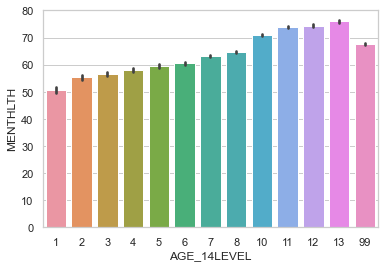

In [126]:
sns.set_theme(style='whitegrid')

line = health_df['AGE_14LEVEL']

values = health_df['MENTHLTH']

# Create Seaborn Line plot to determine basic levels of correlation between Mental health and General Health

sns.barplot(x = line, y = health_df['MENTHLTH'], data=health_df)

# Save Image

# plt.savefig('MentByAge.png')

<AxesSubplot:xlabel='GENHLTH', ylabel='count'>

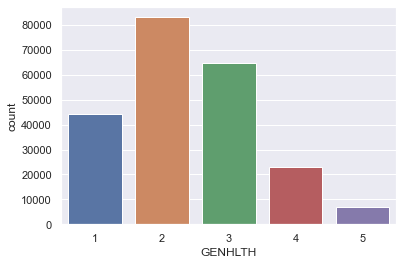

In [132]:
# Set seaborn style for dark background
sns.set(style="darkgrid")
GEN = health_df.GENHLTH[health_df.GENHLTH < 7]
# Plotting counts of General Health survey results (1-Excellent to 5 - Poor)

sns.countplot(x=GEN, data=health_df)

# plt.savefig('GenStats.png')

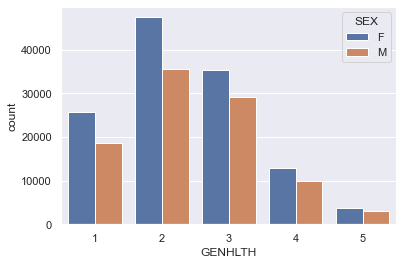

In [133]:
GEN = health_df.GENHLTH[health_df.GENHLTH < 7]
# Plotting counts of General Health survey results (1-Excellent to 5 - Poor)
# Separate by Gender
sns.countplot(x=GEN, data=health_df, hue='SEX')

plt.savefig('GenSexStats.png')

#### BAR CHART (HOW MANY DAYS IN A MONTH DID YOU HAVE A MENTAL HEALTH PROBLEM?)

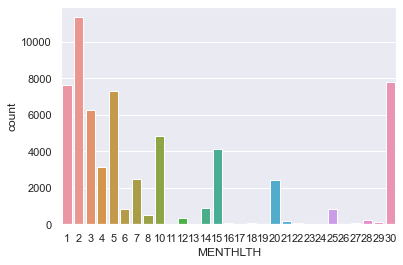

In [128]:
# Set seaborn style for dark background
sns.set(style="darkgrid")

# Clean data of irrelevant values
clean_ment = health_df.MENTHLTH[health_df.MENTHLTH < 66]

# Count plot for number of mental health problems experienced in a month

sns.countplot(x=clean_ment, data=health_df)

plt.savefig('MentalHealthDays.png')

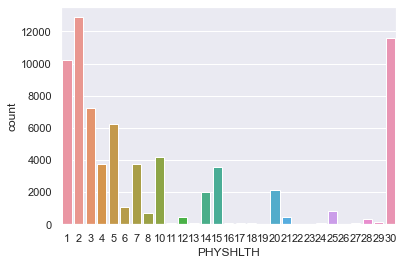

In [129]:
# Set seaborn style for dark background
sns.set(style="darkgrid")

# Clean data of irrelevant values
clean_phys = health_df.PHYSHLTH[health_df.PHYSHLTH < 66]

# Count plot for number of days physical health was not good according to individual.

sns.countplot(x=clean_phys, data=health_df)

plt.savefig('PhysHealthStatus.png')

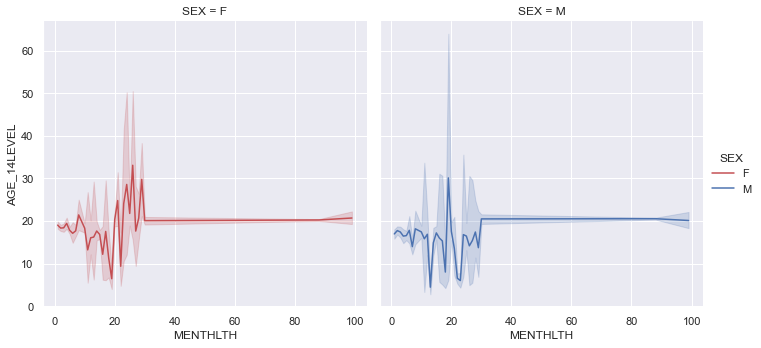

In [135]:
sns.relplot(
    data = health_df, x='MENTHLTH', y='AGE_14LEVEL',col='SEX',hue='SEX',kind='line', palette=['r','b'])

# plt.savefig('MENTvPHYS.png')

In [ ]:
sns.relplot(
    data = health_df, x=clean_phys, y=clean_ment,col='SEX',hue='SEX',kind='line', palette=['r','b'])

plt.savefig('MENTvPHYS.png')

## CLEANING SEPARATE SHEET FOR DASHBOARD ANALYSIS

In [33]:
clean_df = pd.read_csv('Resources/2015_clean.csv')

In [34]:
clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
171202,24,2.0,88.0,88,NaN,1,1,2.0,4,88.0,6.0,1.0,220.0,510.0
180576,25,2.0,88.0,88,NaN,1,1,2.0,1,88.0,99.0,1.0,180.0,504.0
352891,46,2.0,88.0,88,NaN,1,1,2.0,7,88.0,3.0,1.0,175.0,510.0
158491,23,3.0,5.0,15,3.0,1,2,2.0,5,1.0,5.0,1.0,150.0,507.0
151738,22,3.0,5.0,10,4.0,1,2,2.0,1,88.0,7.0,1.0,170.0,503.0
307142,39,2.0,88.0,88,NaN,1,2,1.0,7,88.0,8.0,1.0,215.0,505.0
405070,53,3.0,99.0,99,88.0,2,2,2.0,9,88.0,99.0,1.0,140.0,506.0
438730,72,4.0,88.0,88,NaN,1,2,2.0,7,3.0,77.0,2.0,152.0,501.0
20383,5,1.0,88.0,2,88.0,1,2,2.0,7,88.0,8.0,1.0,9999.0,503.0
115484,19,3.0,14.0,88,2.0,1,2,2.0,1,1.0,77.0,1.0,240.0,500.0


In [36]:
# Making readable values for presentation purposes


clean_df['SEX'].replace([1,2],['M','F'], inplace=True)

clean_df['CHILDREN'].replace([88.0, 99.0], [0, 0], inplace=True)

clean_df['PHYSHLTH'].replace([88.0,77.0,99.0], [0,0,0], inplace=True)

clean_df['POORHLTH'].replace([88.0,77.0,99.0], [0,0,0], inplace=True)

clean_df['MENTHLTH'].replace([88.0,77.0], [0,0], inplace=True)

clean_df = clean_df[clean_df.MENTHLTH != 0]

clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
406781,53,3.0,4.0,2,0.0,1,F,2.0,1,0.0,7.0,1.0,135.0,507.0
234507,31,4.0,2.0,25,25.0,1,M,2.0,3,0.0,3.0,1.0,165.0,504.0
58916,9,3.0,0.0,30,0.0,1,M,2.0,4,0.0,5.0,1.0,180.0,511.0
198902,27,5.0,30.0,3,4.0,1,F,2.0,7,0.0,4.0,2.0,150.0,503.0
132327,20,5.0,30.0,20,0.0,1,M,2.0,1,0.0,4.0,1.0,511.0,511.0
365508,48,5.0,30.0,30,20.0,1,M,2.0,8,0.0,3.0,1.0,160.0,600.0
27070,6,3.0,0.0,4,0.0,1,F,2.0,2,2.0,8.0,1.0,138.0,508.0
263302,34,2.0,3.0,4,2.0,1,F,2.0,2,0.0,8.0,1.0,162.0,504.0
51220,9,4.0,7.0,3,0.0,1,F,2.0,1,1.0,3.0,1.0,180.0,506.0
420184,54,4.0,14.0,15,14.0,2,F,2.0,1,0.0,3.0,1.0,140.0,505.0


In [32]:
poor_gen_hlth = clean_df[clean_df.GENHLTH == 5]

poor_gen_hlth.sample(10)

NameError: name 'clean_df' is not defined

In [37]:
# Dictionary for labeling states

states = {1:'AL',
2:'AK',
4:'AZ',
5:'AR',
6:'CA',
8:'CO',
9:'CT',
10:'DL',
11:'DC',
12:'FL',
13:'GA',
15:'HI',
16:'ID',
17:'IL',
18:'IN',
19:'IA',
20:'KS',
21:'KY',
22:'LA',
23:'ME',
24:'MD',
25:'MS',
26:'MI',
27:'MN',
28:'MS',
29:'MO',
30:'MT',
31:'NE',
32:'NV',
33:'NH',
34:'NJ',
35:'NM',
36:'NY',
37:'NC',
38:'ND',
39:'OH',
40:'OK',
41:'OR',
42:'PA',
44:'RI',
45:'SC',
46:'SD',
47:'TN',
48:'TX',
49:'UT',
50:'VT',
51:'VA',
53:'WA',
54:'WV',
55:'WI',
56:'WY',
66:'GU',
72:'PR'}
          


In [38]:
# replace state numbers with names

state_df = clean_df.replace({'_STATE': states})

state_df

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
0,AL,5.0,15.0,18,10.0,1,F,2.0,8,0.0,3.0,2.0,280.0,510.0
3,AL,5.0,30.0,30,30.0,1,F,2.0,8,1.0,8.0,2.0,180.0,507.0
6,AL,2.0,0.0,3,0.0,1,F,2.0,7,0.0,4.0,2.0,148.0,506.0
16,AL,5.0,30.0,30,30.0,1,F,2.0,8,0.0,1.0,1.0,200.0,508.0
24,AL,5.0,N/A,99,N/A,1,M,1.0,9,0.0,3.0,2.0,210.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441434,PR,1.0,0.0,5,0.0,1,M,2.0,1,0.0,5.0,1.0,280.0,600.0
441436,PR,5.0,0.0,15,0.0,1,F,2.0,7,0.0,4.0,2.0,145.0,504.0
441441,PR,4.0,30.0,N/A,30.0,1,M,2.0,7,0.0,3.0,1.0,230.0,600.0
441448,PR,3.0,4.0,14,0.0,1,M,2.0,1,1.0,8.0,1.0,270.0,507.0
